In [ ]:
!git clone https://github.com/AliaksandrSiarohin/first-order-model

fatal: destination path 'first-order-model' already exists and is not an empty directory.


In [ ]:
#https://github.com/AliaksandrSiarohin/first-order-model/blob/master/demo.ipynb

In [ ]:
cd first-order-model

/content/first-order-model


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.listdir()

['demo.ipynb',
 'augmentation.py',
 'LICENSE.md',
 'sup-mat',
 'requirements.txt',
 '.dockerignore',
 'hinton.mp4',
 'data',
 'frames_dataset.py',
 'crop-video.py',
 'logger.py',
 '.git',
 'README.md',
 'sync_batchnorm',
 '__pycache__',
 'train.py',
 'Dockerfile',
 'animate.py',
 'run.py',
 'demo.py',
 'reconstruction.py',
 'config',
 'modules',
 '.gitignore']

In [ ]:
os.listdir("/content/gdrive/My Drive")

['Colab Notebooks',
 'RasPy',
 'script',
 '給与明細',
 'Of2016.zip',
 '転職関係20190524',
 'T102HA',
 'omoide',
 'Rins.zip',
 '1119101100_zenbun.pdf',
 'JDLA合格',
 '39204.jpg',
 'ringa.jpg',
 'y-hiroshi(UMU表示名).ipynb',
 'day1演習_y-hiroshi(UMU表示名).ipynb',
 'day2演習_y-hiroshi(UMU表示名).ipynb',
 'day3演習_y-hiroshi(UMU表示名).ipynb',
 'day4演習_y-hiroshi(UMU表示名).ipynb',
 'day5演習_y-hiroshi(UMU表示名).ipynb',
 'day6演習_y-hiroshi(UMU表示名).ipynb',
 'y_hiroshi(UMU表示名).ipynb',
 'all_npy',
 'first-order-motion-model']

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

source_image = imageio.imread('/content/gdrive/My Drive/first-order-motion-model/show.jpg')
reader = imageio.get_reader('/content/gdrive/My Drive/first-order-motion-model/04.mp4')


#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]

fps = reader.get_meta_data()['fps']
driving_video = []
try:
    for im in reader:
        driving_video.append(im)
except RuntimeError:
    pass
reader.close()

driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani
    

HTML(display(source_image, driving_video).to_html5_video())

In [ ]:
source_image[0].size

768

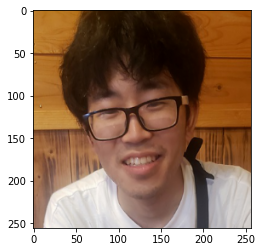

In [ ]:
plt.imshow(source_image)

In [ ]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                            checkpoint_path='/content/gdrive/My Drive/first-order-motion-model/vox-cpk.pth.tar')

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)

#save resulting video
imageio.mimsave('../generated.mp4', [img_as_ubyte(frame) for frame in predictions], fps=fps)
#video can be downloaded from /content folder

HTML(display(source_image, driving_video, predictions).to_html5_video())

100%|██████████| 211/211 [00:08<00:00, 24.89it/s]


In [ ]:
predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=False, adapt_movement_scale=True)
HTML(display(source_image, driving_video, predictions).to_html5_video())

100%|██████████| 211/211 [00:08<00:00, 25.27it/s]


In [ ]:


!ffmpeg -i /content/gdrive/My\ Drive/first-order-motion-model/07.mkv -ss 00:08:57.50 -t 00:00:08 -filter:v "crop=600:600:760:50" -async 1 hinton.mp4



ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
y

In [ ]:
source_image = imageio.imread('/content/gdrive/My Drive/first-order-motion-model/09.png')
driving_video = imageio.mimread('hinton.mp4', memtest=False)


#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=True)

HTML(display(source_image, driving_video, predictions).to_html5_video())

In [ ]:
from skimage.transform import SimilarityTransform

In [ ]:
from skimage.transform._geometric import _umeyama as umeyama

In [ ]:
umeyama

<function skimage.transform._geometric._umeyama>